In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [55]:
df = pd.read_csv("life_cleaned.csv")
df

,geo,name,non_linearity_count,non_linearity_ratio,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,187,0.621262,28.21,28.20,28.19,28.18,28.17,28.16,...,75.92,76.07,76.21,76.36,76.50,76.65,76.80,76.95,77.10,77.25
1,ago,Angola,144,0.478405,26.98,26.98,26.98,26.98,26.98,26.98,...,75.75,75.87,75.99,76.12,76.26,76.39,76.52,76.65,76.79,76.91
2,alb,Albania,204,0.677741,35.40,35.40,35.40,35.40,35.40,35.40,...,88.93,89.05,89.17,89.28,89.40,89.51,89.62,89.73,89.84,89.95
3,are,UAE,157,0.521595,30.70,30.70,30.70,30.70,30.70,30.70,...,83.67,83.78,83.90,84.02,84.14,84.24,84.35,84.47,84.58,84.69
4,arg,Argentina,171,0.568106,33.20,33.20,33.20,33.20,33.20,33.20,...,86.81,86.94,87.05,87.16,87.27,87.39,87.50,87.61,87.73,87.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,wsm,Samoa,145,0.481728,25.40,25.40,25.40,25.40,25.40,25.40,...,81.11,81.25,81.38,81.51,81.64,81.77,81.90,82.02,82.15,82.27
180,yem,Yemen,183,0.607973,23.39,23.39,23.39,23.39,23.39,23.39,...,80.59,80.76,80.92,81.08,81.25,81.40,81.58,81.75,81.92,82.08
181,zaf,South Africa,207,0.687708,33.50,33.50,33.50,33.50,33.50,33.50,...,74.02,74.15,74.29,74.42,74.55,74.69,74.82,74.96,75.09,75.24
182,zmb,Zambia,155,0.514950,32.60,32.60,32.60,32.60,32.60,32.60,...,73.29,73.42,73.55,73.69,73.81,73.95,74.08,74.22,74.35,74.48


In [180]:
index_country_dict = df["name"].to_dict()

In [56]:
df_1dif = df.iloc[:, 4:].diff(axis=1)
df_1dif

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,NaN,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,0.14,0.15,0.14,0.15,0.14,0.15,0.15,0.15,0.15,0.15
1,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.12,0.12,0.12,0.13,0.14,0.13,0.13,0.13,0.14,0.12
2,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.11,0.12,0.12,0.11,0.12,0.11,0.11,0.11,0.11,0.11
3,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.13,0.11,0.12,0.12,0.12,0.10,0.11,0.12,0.11,0.11
4,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.11,0.13,0.11,0.11,0.11,0.12,0.11,0.11,0.12,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.13,0.14,0.13,0.13,0.13,0.13,0.13,0.12,0.13,0.12
180,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.16,0.17,0.16,0.16,0.17,0.15,0.18,0.17,0.17,0.16
181,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.13,0.13,0.14,0.13,0.13,0.14,0.13,0.14,0.13,0.15
182,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.13,0.13,0.13,0.14,0.12,0.14,0.13,0.14,0.13,0.13


In [135]:
df_z = abs((df_1dif - df_1dif.mean()) / df_1dif.std()) # the formula of the z score, and abs() it
mask = df_z > 3 # no need loc[], cuz wer doing on the whole table
df_lister = df_z[mask] # which ll give us a table full of NaN, and val bigger than 3, means 3 sd

idx_per_col = df_lister.notna().apply(lambda s: s.index[s].to_list())

----
## Short term alert,

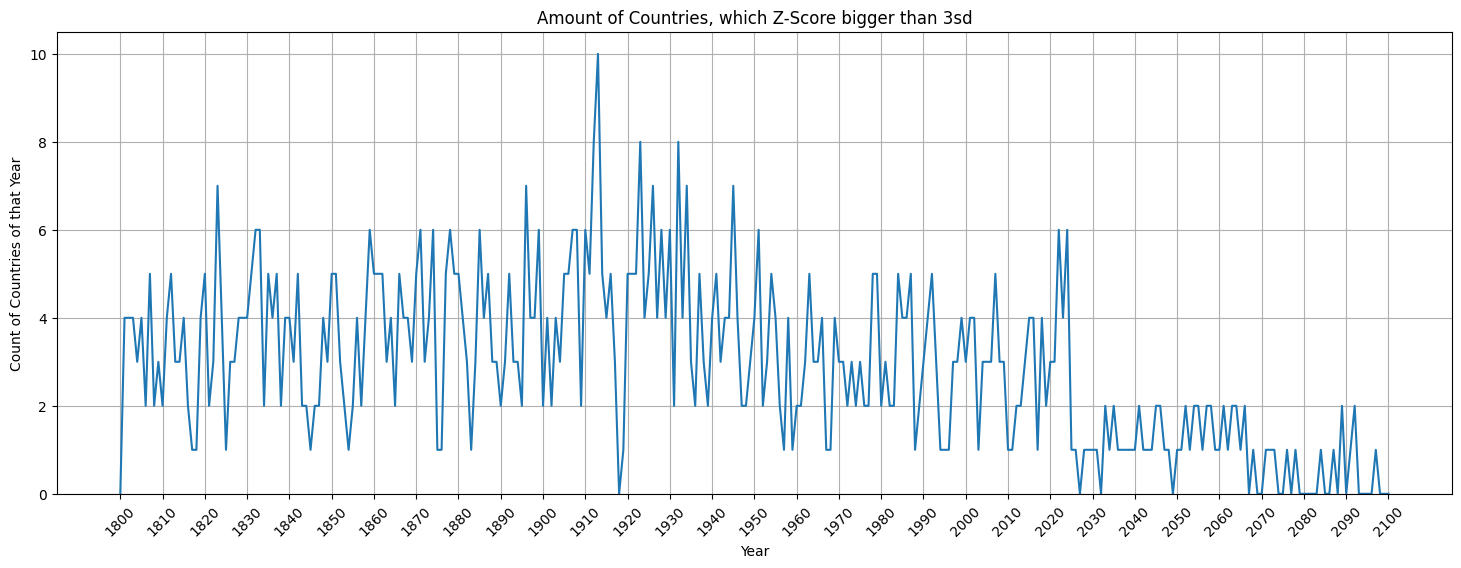

In [154]:
# the countries > 3sd of each year 
series_short_flag = df_lister.notna().sum()
years = list(df_1dif.columns)

plt.figure(figsize=(18,6))
plt.plot(years, series_short_flag.values)

plt.xlabel("Year")
plt.ylabel("Count of Countries of that Year")
plt.title("Amount of Countries, which Z-Score bigger than 3sd")
plt.xticks(years[::10],rotation=45)
plt.ylim(bottom=0)
# plt.legend(loc='lower left')
plt.grid()
plt.show()

In [ ]:
# Countries hit the short alert
temp = list(idx_per_col.values)

holder = []
for n in temp:
    holder.extend(n)
n_holder = set(holder)
len(n_holder) # 130, means 130/184 countries hit the short alert

130

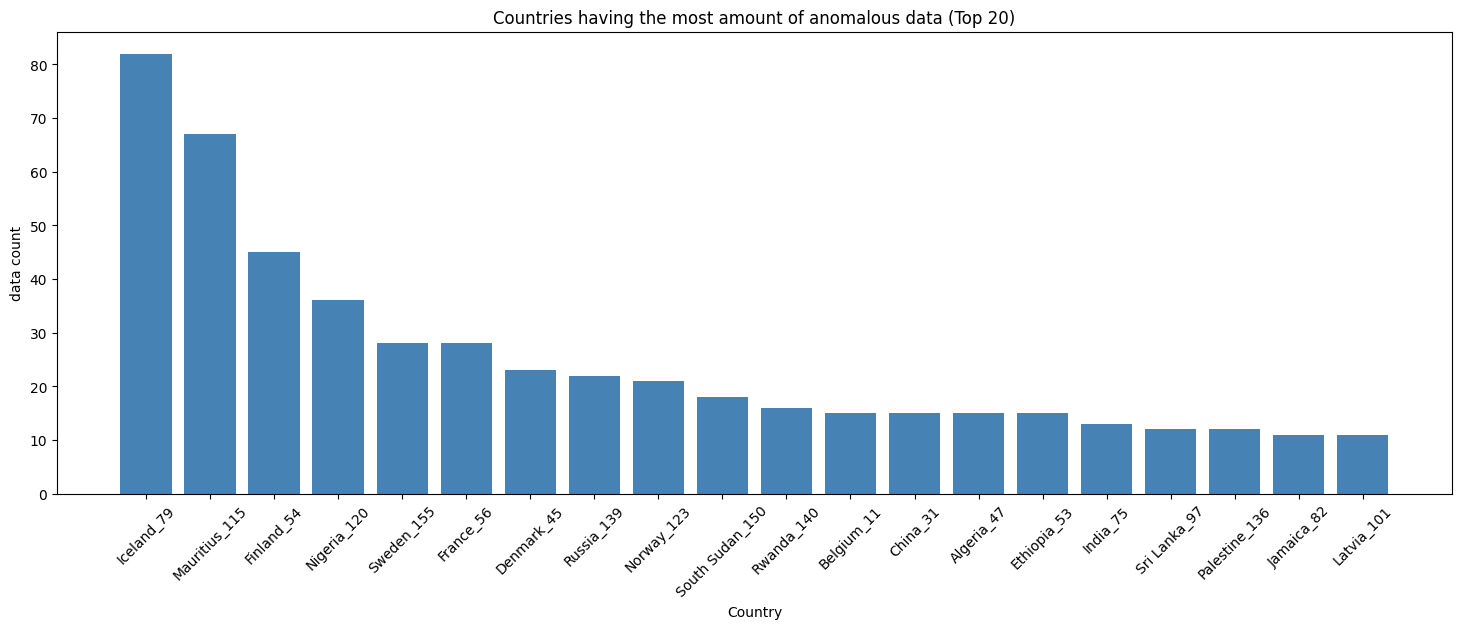

In [197]:
series_short_flag_top20 = df_lister.notna().sum(axis=1).sort_values(ascending=False).head(20).to_dict()

plt.figure(figsize=(18,6))
for i, n in series_short_flag_top20.items():
    plt.bar((str(index_country_dict[i])+ '_' + str(i)), n, color="steelblue")

plt.xlabel("Country")
plt.ylabel("data count")
plt.title("Countries having the most amount of anomalous data (Top 20)")
plt.xticks(rotation=45)
plt.show()

In [58]:
df_lister.loc[df_lister['1802'] > 3, "1802"]

45     7.983521
79     8.573463
123    3.461770
155    4.486336
Name: 1802, dtype: float64

In [112]:
df_lister[df_lister.iloc[[115]].notna()]

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


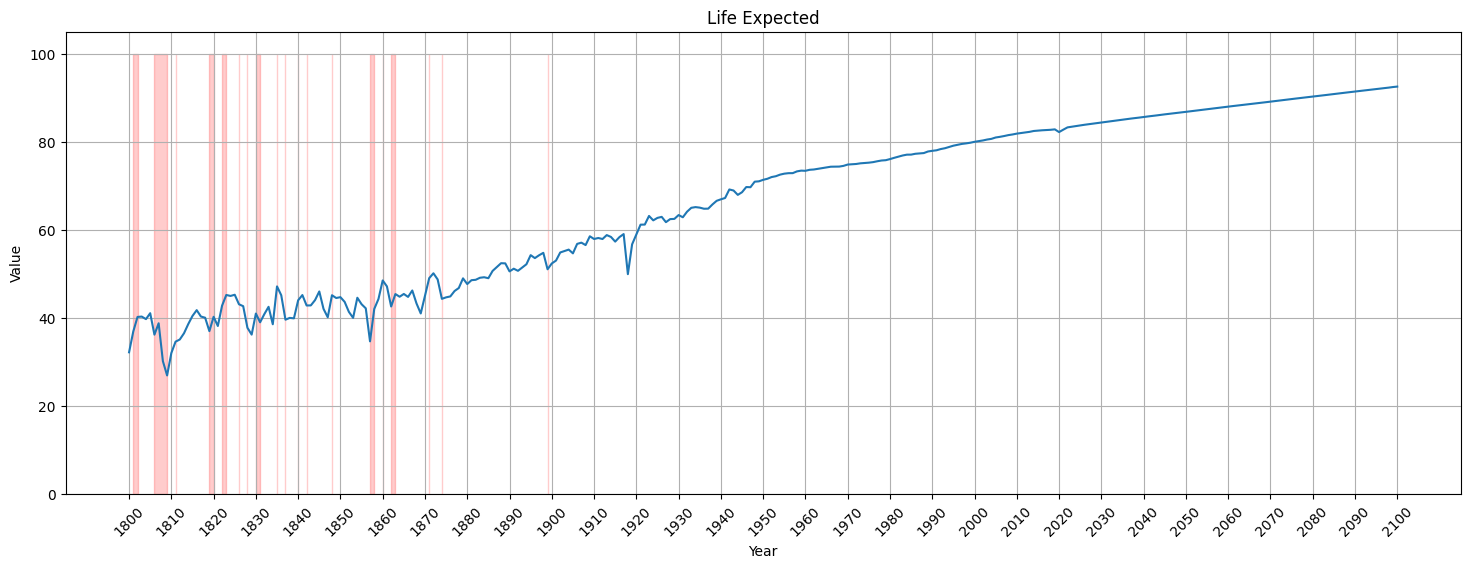

In [113]:
years = list(df_1dif.columns)

target = df.iloc[155, 4:]
df_series = df_lister.iloc[155]
plt.figure(figsize=(18, 6))
plt.plot(years, target.values)

plt.fill_between(df_series.index, 0, 100, 
                 where=(df_series.notna()), 
                 color='red', alpha=0.2)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Life Expected")
plt.xticks(years[::10],rotation=45)
plt.ylim(bottom=0)
# plt.legend(loc='lower left')
plt.grid()
plt.show()